In [1]:
%matplotlib inline
from bs4 import BeautifulSoup
import urllib2
import urllib
import json
import csv
import time
import pickle
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
import sys
import os
import time
sns.set_style("whitegrid")
sns.set_context("poster")

In [13]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

In [2]:
from sklearn.svm import SVR

In [5]:
features_df = pd.read_csv('features_no_sentiment.csv')

In [9]:
features_df.head()

,Avg_Tweets,company_name,Series,Total_Likes,Total_Retweets,Series_Amount,Market,tweet_count,get_dayrange,get_dayiqr,likes_mean,retweets_mean,persontag_count_mean,hashtag_count_mean,text_length_mean,persontags_count_mean,hashtags_count_mean,links_count_mean,self_mention_mean,self_tweet_mean,likes_std,retweets_std,persontag_count_std,hashtag_count_std,text_length_std,persontags_count_std,hashtags_count_std,links_count_std,self_mention_std,self_tweet_std,is_Biotechnology,is_Software,is_Health Care,is_Enterprise Software,is_Clean Technology,is_Hardware + Software,is_Semiconductors,is_Curated Web,is_Mobile,is_Web Hosting,is_Series_A,is_Series_B,is_Series_C,is_Series_D
0,16.384615,1stdibs,_Series_C,230,134,15000000,Semiconductors,213,13,7,1.863850,1.521127,0.957746,1.098592,130.516432,0.934272,1.093897,0.840376,0.436620,0.145540,5.780192,7.009816,1.087276,1.882052,38.451464,1.079570,1.876018,0.458529,0.515763,0.353475,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,1.603960,2tor,_Series_C,10,32,32500000,NaN,162,98,42,0.061728,0.197531,0.956790,0.574074,108.623457,0.864198,0.574074,0.697531,0.185185,0.000000,0.328584,0.648357,1.287053,0.648031,34.011510,1.268374,0.648031,0.486967,0.389652,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,163.000000,365Scores,_Series_B,15,23,5500000,Apps,163,1,1,0.092025,0.141104,0.582822,1.515337,181.895706,0.552147,1.490798,0.914110,0.184049,0.049080,0.348007,0.656189,0.822642,1.113086,43.445668,0.771029,1.090747,0.302230,0.388718,0.216700,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,2.109756,36Kr,_Series_C,58,21,20000,Startups,173,83,43,1.312139,0.393064,0.364162,0.520231,149.664740,0.289017,0.427746,0.630058,0.023121,0.000000,12.936146,2.761100,0.792618,1.009200,85.569792,0.680070,0.896851,0.518964,0.150725,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,0.696850,6fusion,_Series_B,2,28,7000000,Hardware + Software,177,251,131,0.011299,0.158192,0.593220,0.468927,108.621469,0.564972,0.463277,0.576271,0.384181,0.050847,0.105996,0.462028,0.894147,0.783636,32.634132,0.896657,0.776104,0.539467,0.487781,0.220309,False,False,False,False,False,True,False,False,False,False,False,True,False,False


In [7]:
features_df.shape

(1210, 45)

In [8]:
features_df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [16]:
itrain, itest = train_test_split(xrange(features_df.shape[0]), train_size=0.9)
mask=np.ones(features_df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask=(mask==1)
df_train = features_df[mask]
df_test = features_df[~mask]
df_train.head()

,Avg_Tweets,company_name,Series,Total_Likes,Total_Retweets,Series_Amount,Market,tweet_count,get_dayrange,get_dayiqr,likes_mean,retweets_mean,persontag_count_mean,hashtag_count_mean,text_length_mean,persontags_count_mean,hashtags_count_mean,links_count_mean,self_mention_mean,self_tweet_mean,likes_std,retweets_std,persontag_count_std,hashtag_count_std,text_length_std,persontags_count_std,hashtags_count_std,links_count_std,self_mention_std,self_tweet_std,is_Biotechnology,is_Software,is_Health Care,is_Enterprise Software,is_Clean Technology,is_Hardware + Software,is_Semiconductors,is_Curated Web,is_Mobile,is_Web Hosting,is_Series_A,is_Series_B,is_Series_C,is_Series_D
0,16.384615,1stdibs,_Series_C,230,134,15000000,Semiconductors,213,13,7,1.863850,1.521127,0.957746,1.098592,130.516432,0.934272,1.093897,0.840376,0.436620,0.145540,5.780192,7.009816,1.087276,1.882052,38.451464,1.079570,1.876018,0.458529,0.515763,0.353475,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,1.603960,2tor,_Series_C,10,32,32500000,NaN,162,98,42,0.061728,0.197531,0.956790,0.574074,108.623457,0.864198,0.574074,0.697531,0.185185,0.000000,0.328584,0.648357,1.287053,0.648031,34.011510,1.268374,0.648031,0.486967,0.389652,0.000000,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,163.000000,365Scores,_Series_B,15,23,5500000,Apps,163,1,1,0.092025,0.141104,0.582822,1.515337,181.895706,0.552147,1.490798,0.914110,0.184049,0.049080,0.348007,0.656189,0.822642,1.113086,43.445668,0.771029,1.090747,0.302230,0.388718,0.216700,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,0.696850,6fusion,_Series_B,2,28,7000000,Hardware + Software,177,251,131,0.011299,0.158192,0.593220,0.468927,108.621469,0.564972,0.463277,0.576271,0.384181,0.050847,0.105996,0.462028,0.894147,0.783636,32.634132,0.896657,0.776104,0.539467,0.487781,0.220309,False,False,False,False,False,True,False,False,False,False,False,True,False,False
5,4.479167,6sense,_Series_A,42,43,12000000,Invest Online,215,47,24,0.195349,0.241860,0.646512,0.497674,104.497674,0.595349,0.451163,0.181395,0.102326,0.000000,0.554486,1.066533,0.782803,1.167610,74.457218,0.748192,1.066125,0.386245,0.303783,0.000000,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [31]:
for col in df_train.columns:
    if col.startswith('is_'):
        df_train[col] = df_train[col].apply(lambda x: int(x == True))

/Users/Jerry/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [32]:
df_train.head()

,Avg_Tweets,company_name,Series,Total_Likes,Total_Retweets,Series_Amount,Market,tweet_count,get_dayrange,get_dayiqr,likes_mean,retweets_mean,persontag_count_mean,hashtag_count_mean,text_length_mean,persontags_count_mean,hashtags_count_mean,links_count_mean,self_mention_mean,self_tweet_mean,likes_std,retweets_std,persontag_count_std,hashtag_count_std,text_length_std,persontags_count_std,hashtags_count_std,links_count_std,self_mention_std,self_tweet_std,is_Biotechnology,is_Software,is_Health Care,is_Enterprise Software,is_Clean Technology,is_Hardware + Software,is_Semiconductors,is_Curated Web,is_Mobile,is_Web Hosting,is_Series_A,is_Series_B,is_Series_C,is_Series_D
0,16.384615,1stdibs,_Series_C,230,134,15000000,Semiconductors,213,13,7,1.863850,1.521127,0.957746,1.098592,130.516432,0.934272,1.093897,0.840376,0.436620,0.145540,5.780192,7.009816,1.087276,1.882052,38.451464,1.079570,1.876018,0.458529,0.515763,0.353475,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1.603960,2tor,_Series_C,10,32,32500000,NaN,162,98,42,0.061728,0.197531,0.956790,0.574074,108.623457,0.864198,0.574074,0.697531,0.185185,0.000000,0.328584,0.648357,1.287053,0.648031,34.011510,1.268374,0.648031,0.486967,0.389652,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,163.000000,365Scores,_Series_B,15,23,5500000,Apps,163,1,1,0.092025,0.141104,0.582822,1.515337,181.895706,0.552147,1.490798,0.914110,0.184049,0.049080,0.348007,0.656189,0.822642,1.113086,43.445668,0.771029,1.090747,0.302230,0.388718,0.216700,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.696850,6fusion,_Series_B,2,28,7000000,Hardware + Software,177,251,131,0.011299,0.158192,0.593220,0.468927,108.621469,0.564972,0.463277,0.576271,0.384181,0.050847,0.105996,0.462028,0.894147,0.783636,32.634132,0.896657,0.776104,0.539467,0.487781,0.220309,0,0,0,0,0,1,0,0,0,0,0,1,0,0
5,4.479167,6sense,_Series_A,42,43,12000000,Invest Online,215,47,24,0.195349,0.241860,0.646512,0.497674,104.497674,0.595349,0.451163,0.181395,0.102326,0.000000,0.554486,1.066533,0.782803,1.167610,74.457218,0.748192,1.066125,0.386245,0.303783,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [34]:
X.isnull().values.any()


False

In [58]:
num_cols

['Avg_Tweets',
 'Total_Likes',
 'Total_Retweets',
 'Series_Amount',
 'tweet_count',
 'get_dayrange',
 'get_dayiqr',
 'likes_mean',
 'retweets_mean',
 'persontag_count_mean',
 'hashtag_count_mean',
 'text_length_mean',
 'persontags_count_mean',
 'hashtags_count_mean',
 'links_count_mean',
 'self_mention_mean',
 'self_tweet_mean',
 'likes_std',
 'retweets_std',
 'persontag_count_std',
 'hashtag_count_std',
 'text_length_std',
 'persontags_count_std',
 'hashtags_count_std',
 'links_count_std',
 'self_mention_std',
 'self_tweet_std',
 'is_Biotechnology',
 'is_Software',
 'is_Health Care',
 'is_Enterprise Software',
 'is_Clean Technology',
 'is_Hardware + Software',
 'is_Semiconductors',
 'is_Curated Web',
 'is_Mobile',
 'is_Web Hosting',
 'is_Series_A',
 'is_Series_B',
 'is_Series_C',
 'is_Series_D']

In [61]:
from sklearn.decomposition import PCA
# X = df_train[[col for col in df_train.columns if col not in ['company_name','Series','Market']]]
# X = df_train[['Total_Likes','Total_Retweets', 'get_dayrange','tweet_count']]
X = df_train[num_cols]
pca = PCA(n_components=2)


In [ ]:
df_train.drop()

In [64]:
num_cols = [col for col in df_train.columns if col not in ['company_name','Series','Market', 'Avg_Tweets'] and not col.startswith('is_')]

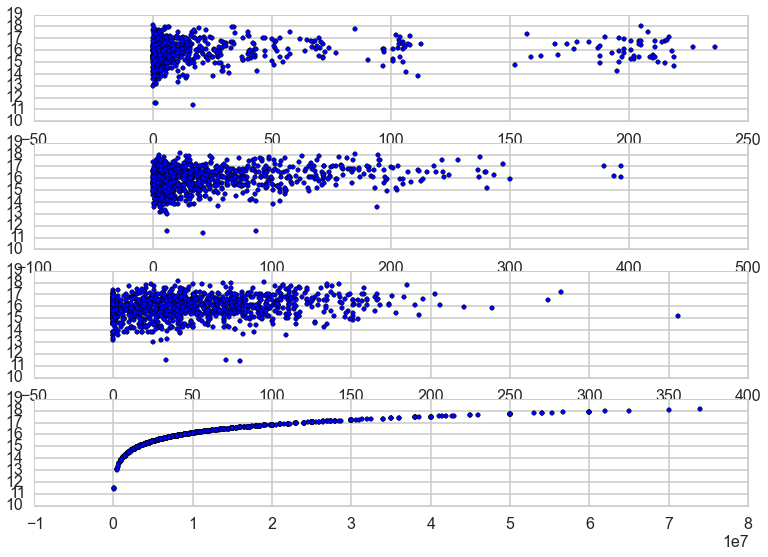

In [70]:
num_cols = [col for col in df_train.columns if col not in ['company_name','Series','Market'] and not col.startswith('is_')]
f, axarr = plt.subplots(4, sharey=True)
for i, col in enumerate(num_cols):
    if i < 4:
        axarr[i].scatter(df_train[col], np.log(df_train['Series_Amount']))

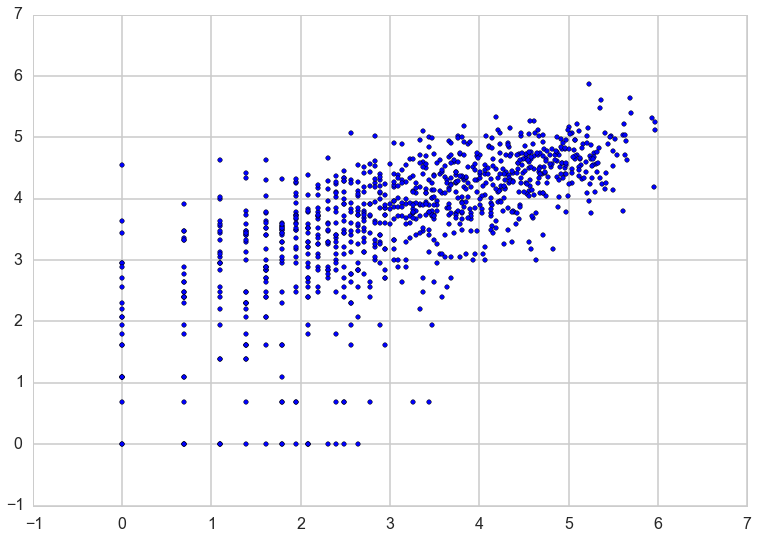

In [65]:
plt.scatter(np.log(df_train['Total_Likes']), np.log(df_train['Total_Retweets']))

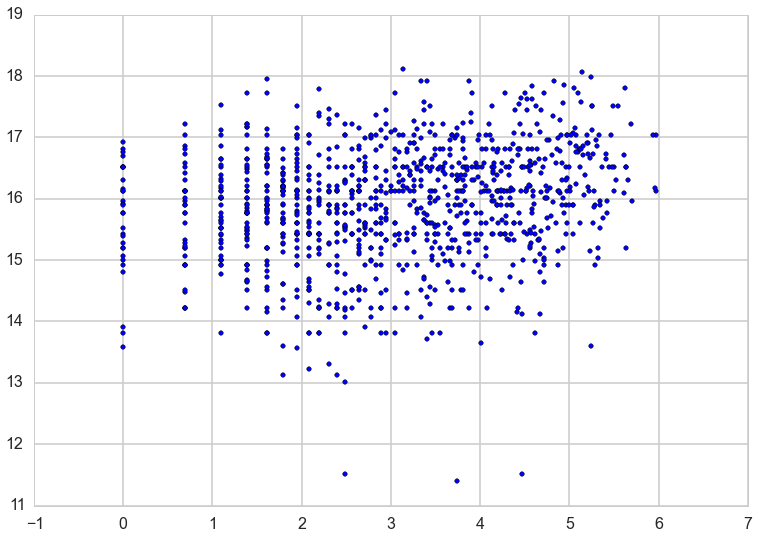

In [68]:
plt.scatter(np.log(df_train['Total_Likes']), np.log(df_train['Series_Amount']))

In [62]:
temp = pca.fit_transform(X)
plt.scatter([point[0] for point in temp],[point[1] for point in temp])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [63]:
np.isfinite(X).all()

Avg_Tweets               False
Total_Likes               True
Total_Retweets            True
Series_Amount             True
tweet_count               True
get_dayrange              True
get_dayiqr                True
likes_mean                True
retweets_mean             True
persontag_count_mean      True
hashtag_count_mean        True
text_length_mean          True
persontags_count_mean     True
hashtags_count_mean       True
links_count_mean          True
self_mention_mean         True
self_tweet_mean           True
likes_std                 True
retweets_std              True
persontag_count_std       True
hashtag_count_std         True
text_length_std           True
persontags_count_std      True
hashtags_count_std        True
links_count_std           True
self_mention_std          True
self_tweet_std            True
dtype: bool

In [38]:
plt.scatter(pca.fit_transform(X))

TypeError: scatter() takes at least 2 arguments (1 given)

In [36]:
print(pca.explained_variance_ratio_) 

[  1.00000000e+00   3.22560066e-10]


/Users/Jerry/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


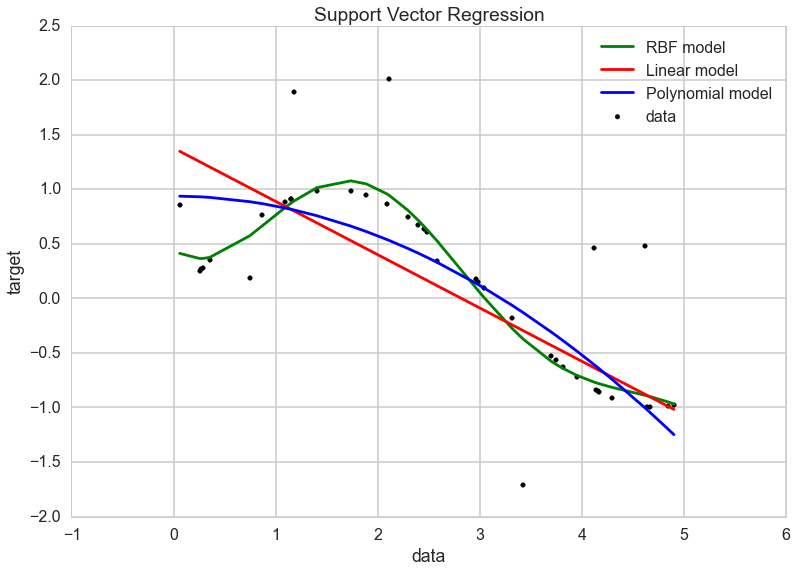

In [18]:
###############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

###############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

###############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

###############################################################################
# look at the results
plt.scatter(X, y, c='k', label='data')
plt.hold('on')
plt.plot(X, y_rbf, c='g', label='RBF model')
plt.plot(X, y_lin, c='r', label='Linear model')
plt.plot(X, y_poly, c='b', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()